In [30]:

#Loading Libraries#Loading 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [31]:
df= pd.read_csv('C:/Users/Morty/Desktop/netflow_day-02.csv', nrows=1000000)

In [32]:
#First 5 Rows of Data
df.head()

,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [33]:
#Selecting Numeric Fields To Be Used In Modelling
X = df[['SrcPackets','DstPackets','SrcBytes','DstBytes']]

In [34]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [35]:
X_normalized.columns = ['SrcPackets','DstPackets','SrcBytes','DstBytes']

In [36]:
#Implementing Algorithm
from sklearn.ensemble import IsolationForest
iforest = IsolationForest()
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [37]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [38]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [39]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,100002
1,899998


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002192E33B8D0>,
      dtype=object)

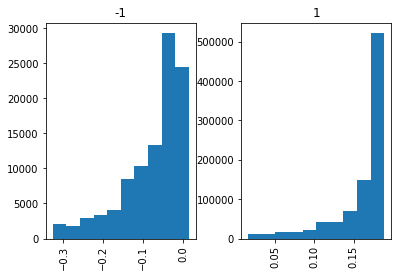

In [40]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])

In [41]:
#Descriptive Statistics
X['Anomaly_Score'].describe()

count    1000000.000000
mean           0.138307
std            0.082193
min           -0.327419
25%            0.131759
50%            0.174171
75%            0.185946
max            0.188858
Name: Anomaly_Score, dtype: float64

In [42]:
#Implementing Algorithm With Different Parameters#Impleme 
#contamination: Proportion of outliers in the data set
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [43]:
#Predicting Anomaly Class and Anomaly Score
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [44]:
#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Contamination'] = Anomaly_Class
X['Anomaly_Score_Contamination'] = Anomaly_Score

In [45]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Contamination')[['Anomaly_Score_Contamination']].count()


,Anomaly_Score_Contamination
Anomaly_Class_Contamination,
-1,200139
1,799861


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002192F36F2E8>,
      dtype=object)

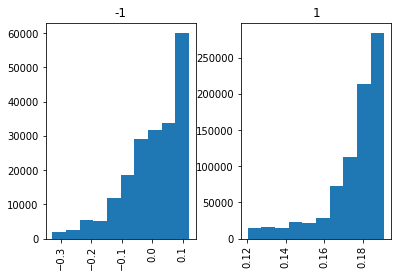

In [46]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Contamination'].hist(by=X['Anomaly_Class_Contamination'])

In [47]:
#Descriptive Statistics
X['Anomaly_Score_Contamination'].describe()

count    1000000.000000
mean           0.141821
std            0.082181
min           -0.327979
25%            0.143167
50%            0.176912
75%            0.187150
max            0.191150
Name: Anomaly_Score_Contamination, dtype: float64

In [48]:
#Implementing Algorithm With Different Parameters
#bootstrap: If True, individual trees are fit on random subsets of the training data sampled with replacement.
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(bootstrap=True)
iforest.fit(X_normalized)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [49]:

#Predicting Anomaly Class and Anomaly Score#Predict 
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [50]:

#Creating New Columns Based on Anomaly Detection
X['Anomaly_Class_Bootstrap'] = Anomaly_Class
X['Anomaly_Score_Bootstrap'] = Anomaly_Score

In [51]:
#Viewing Class Counts
#-1 is anomaly, 1 is normal
X.groupby('Anomaly_Class_Bootstrap')[['Anomaly_Score_Bootstrap']].count()

,Anomaly_Score_Bootstrap
Anomaly_Class_Bootstrap,
-1,100011
1,899989


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002192E3F4AC8>,
      dtype=object)

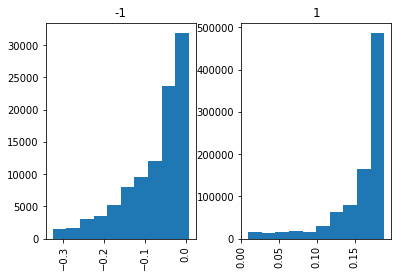

In [52]:
#Histogram of Anomaly Scores By Anomaly Class
X['Anomaly_Score_Bootstrap'].hist(by=X['Anomaly_Class_Bootstrap'])

In [53]:

#Original Data Set With New Variables#Origina 
X.head()

,SrcPackets,DstPackets,SrcBytes,DstBytes,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination,Anomaly_Score_Contamination,Anomaly_Class_Bootstrap,Anomaly_Score_Bootstrap
0,0,755065,0,1042329018,-1,-0.232050,-1,-0.210551,-1,-0.214885
1,1665,1108,300810,250408,1,0.173695,1,0.176023,1,0.176099
2,1866,0,1477041,0,1,0.185429,1,0.184471,1,0.186038
3,3326,0,2656305,0,1,0.183112,1,0.183677,1,0.185472
4,5423,0,4388449,0,1,0.183216,1,0.178380,1,0.180903


In [54]:
#Top 5 Anomaly Records
X[['Anomaly_Score_Contamination','Anomaly_Score_Bootstrap','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination'], ascending=[1])

,Anomaly_Score_Contamination,Anomaly_Score_Bootstrap,Anomaly_Score
0,-0.210551,-0.214885,-0.232050
1,0.176023,0.176099,0.173695
4,0.178380,0.180903,0.183216
3,0.183677,0.185472,0.183112
2,0.184471,0.186038,0.185429
